# Semestrální práce
### KMA/SNM2
### Anežka Švandová, Jan Půlpán

```{toggle} Konzrevativní) Proměnná ($q$) je aproximována jako průměrem řešení přes kontorlní objem $[x_{i-1/2},x_{i+1/2}]$ velikosti $\Delta x$, tzn. tvoří po částech konstantní funkci s Riemanovy problémy na hranicích kontrolních obejmů, pokud aproximovaná hodnota sousedních kontrolních objemů není shodná. Prostorová chyba je řádu $\Delta x$, jedná se tedy o metodu prvního řádu v prostoru. K řešení Riemanových problémů na hranici kontorlních objemů budeme využívat přibližný Riemanův řešič $\texttt{Roe}$, nebo $\texttt{HLL}$. 


# Teoretický úvod
(teoretické základy, shallow water soustava, numerické řešení pomocí Godunova - jen velmi stručně, nechceme opisovat skripta)

## Shallow water equations
Saint-Venantovy rovnice, neblo-li Shallow water equations (SWEs), popisují říční proudění korytem řeky. V této práci se budeme zabývat zjednodušeným případem, kdy budeme předpokládat koryto řeky s konstantním obdélníkovým průřezem. Jedná se tedy o jednodimenzionální úlohu ve tvaru:
$$\begin{equation} \label{eq1}
\begin{bmatrix}
 \\ h \\  \\
hu \\ \\
\end{bmatrix}_{t} +
\begin{bmatrix}
uh \\
hu^{2}+ \textstyle \dfrac{1}{2}gh^{2} \\
\end{bmatrix}_{x} = 0,
\end{equation}
$$
kde $h=h(x,t)$ reprezentuje hledanou hloubku, $u=u(x,t)$ horizontální rychlost a $ g $ je gravitační konstanta. Obecněji úlohů můžeme zapsat jako nelinerní PDR system rovnic ve tvaru zákona zachování:
$$
\begin{equation}
q_{t}+f(q)_{x}=0,
\end{equation}
$$
pokud určíme $q(x,t)=\begin{bmatrix} \\ h \\  \\ hu \\ \\ \end{bmatrix}$ a $f(q)=\begin{bmatrix} uh \\ hu^{2}+ \textstyle \dfrac{1}{2}gh^{2} \\ \end{bmatrix}$. 
## Riemanův problém (Dam-Break Problem)
Počáteční úloha s nespojitou počáteční podmínkou:

$$
\begin{equation}
\left\{
    \begin{split}
     \\ \\ \\
    &q_{t}+f(q)_{x}=0, & \text{ kde }x\in[0,1], t\in(0,T)\\
    &q(x,0)=q_{0}(x)= &\begin{cases} q_{l} \quad \text{ pro }\quad x<x_{0} \\ q_{r} \quad \text{ pro } \quad x>x_{0}\\ \end{cases}, \quad\text{ kde } x_{0}\in{\rm I\!R},\\
    \end{split}
    \right.
\end{equation}
$$

$q_{l}=konst.$ a $q_{r}=konst.$

### Godunova metoda
(základní popis Godunovovi metody)

(__FVM__ konvergence, konzistence apod. - zajímají nás podmínky pro tyhle vlastnosti pro metody které ukážeme (základní Godunov, nějaké metody vyšího řádu) CFL podmínka)

SHWe budeme řešit pomocí Godunovy metod, jedná se o explicitní numerickou metodu pro řešení parciálně diferenciálních rovnic, která koresponduje s metodou konečných objemů. 

__Zjednodušený popis Godunovy metody:__
1. Definujeme uniformní síť bodů $x_{i}=i\Delta x$ a $t_{n}=n\Delta t$, kde $\Delta x > 0$ je námi zvolený prostorový diskretizační krok a $\Delta t > 0$ časový diskretizační krok pro $i = 0,1,\dots 1/\Delta x$ a $n = 0,1,\dots T/\Delta t$. Kontorlní objemy v jednotlivých časových diskretizačních vrstvách jsou pak dány hraničními body $x_{i+1/2}=x_{i}+\Delta x/2$ a  $x_{i-1/2}=x_{i}-\Delta x/2$,  tzn. velikost kontrolního objemu $[x_{i-1/2},x_{i+1/2}]$ je $\Delta x$.
2. Pomocí integrálních průměrů přes jednotlivé kontrolní objemy zkonstruujeme funkci $Q^{n}(x)$, která aproximuje řešení v $n$-té časové diskretizační vrstvě. Tato funkce je po částech konstatní s Riemanovy problémy v bodech nespojitosti.
3. Riemanovy problémy v bodech nespojitosti budeme řešit pomocí přibližných Riemanových řešíčů, kokrétně $\texttt{Roe}$, nebo $\texttt{HLL}$. Godunova metoda pak nabývá tvaru: 

$$ Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(A^{+}\Delta Q_{i-1/2}-A^{-}\Delta Q_{i+1/2}\right), $$

kdy $Q^{n}(x_{i})=Q_{i}^{n}$ a hodnoty $A^{+}\Delta Q_{i-1/2},$ $A^{-}\Delta Q_{i+1/2}$ jsou výstupem Riemanových přibižných řešičů.

Metoda pak spočívá v opakování kroku 2. a 3. až do poslední časové diskteritzační vrstvy - lépe popsat.

__Vlastnosti metody:__

Godunova metoda je metoda prvního řádu v čase i prostoru, ale může být použita jako základní schéma k rozvinutí pro metody vyššího řádu.
Jedná se o konzervativní metodu...

### Godunova metoda druhého řádu

$$ Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(A^{+}\Delta Q_{i-1/2}-A^{-}\Delta Q_{i+1/2}\right)-\frac{\Delta t}{\Delta x}\left(\tilde{F}_{i+1/2}-\tilde{F}_{i-1/2}\right), $$
kde
$$\tilde{F}_{i-1/2} = \frac{1}{2}|s_{i-1/2}|\left(1-\frac{\Delta t}{\Delta x}|s_{i-1/2}|\right)\tilde{W}_{i-1/2} $$

__Obsah__
- numerické experimenty - různé num. metody založené na Godunovovi (co nejvíc bereme z Clawpacku)
    - základní Godunov - zkusít víc Riemann řešičů z Clawpacku (Roe, hll, možná fwave) a porovnat je (podle prvního pohledu se prakticky neliší) 
    - metody vyššího řádu (asi hlavně Lax-Wendrof ???), limitery zase využít z Clawpacku a porovnat (některé kmitají, ale je třeba zjistit a popsat proč)
    - ukázat vliv dělení sítě (CFL)
    - jakej je rozdíl mezi metodou 1. a vyšších řádů

## Numerické experimenty

Řešíme úlohu popsanou v první kapitole pomocí Godunovovy metody s použitím různých (přibližných) Riemannových řešičů a také s odvozenými metodamy vyšších řádů. Jednotlivé numerické metody porovnáme a to jak výsledné řešení, závislost na CFL podmínce ...

Pro všechny numerické testy volíme jednotnou počáteční podmínku ve tvaru "dam break" a to i z důvodu, že známe přesné analytické řešení a budeme tak moci výsledky snadno porovnat.

Jak přibližné Riemannovy řešiče pro shallow watter úlohu tak i limitery použité později v metodách vyššího řádu jsou převzaty z balíku Clawpack (linky). Riemannovy řešiče jsou v souboru *riemann.py* a limitry poté v souboru *tvd.py*.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from shallow_water import exact_riemann_solution
import tvd
from riemann import shallow_roe_1D, shallow_hll_1D

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,9)
plt.rcParams['font.size'] = '16'

*** Warning: JSAnimation not found


Nejprve nastavíme základní parametry jako je velikost gravitační konstanty a interval na kterém úlohu řešíme. Funkce *shallow_ic* nastaví jednu z vybraných počátečních podmínek a funkce *shallow_sol* úlohu vyřeší, případně i vykreslí řešení.

In [4]:
# constants
grav = 9.81

# domain
# x-coordinate, centered around 0
x_start = -1.
x_end = 1.

# initial condition setup
# tohle chce předělat na nějaké obecnější funkce
def shallow_ic(N, ic_type=1):
    '''
    Initial condition type:
    
    1 ... step in half domain
    2 ... 2 steps in domain
    3 ... sinus
    '''
    
    q_state = np.zeros([2,N])
    
    if ic_type == 3:
        q_state[0,:] = .1 * np.sin(np.linspace(0,4*np.pi,N)) +1
        
    elif ic_type == 2:
        for i in range(N):
            if i < N/3:
                q_state[0,i] = 5
            elif N/3 <= i < 2*N/3:
                q_state[0,i] = 3
            else: 
                q_state[0,i] = 1
            
    else:
        q_state[0,0:int(N/2)] = 4
        q_state[0,int(N/2):] = 1

    return q_state

# shallow water system solution
def shallow_sol(q_state,
                x_start=-1.,
                x_end=1.,
                N=200,
                T=.05,
                Nt=50,   
                riemann_solver=shallow_roe_1D,
                higher_order = False,
                limiter=tvd.minmod,
                exact_q=False,
                plot_sol=False,
               ):
    
    # problem_data
    problem_data = {'grav' : grav,
               'efix' : False}
    
    # x axis for plots
    x = np.linspace(x_start, x_end, N)
    
    # size of spatial and time steps
    dx = (x_end-x_start)/N # 0.005 #
    dt = T/Nt
    dtdx = dt/dx
    
    aux_l, aux_r = 0, 0
    limiters = np.full(N,limiter)
    
    #maximalni rychlost
    s_max = np.zeros(Nt)
    
    # iterate solution for Nt time steps
    for i in range(Nt):
        q_l = q_state[:,:-1]
        q_r = q_state[:,1:]

        # solve Riemann problems at all faces 
        wave, s, amdq, apdq = riemann_solver(q_l, q_r, aux_l, aux_r, problem_data)
        s_max[i] = np.nanmax(np.abs(s))

        # update state with Riemann solutions
        q_state[:,:-1] = q_state[:,:-1] - dtdx * amdq
        q_state[:,1:] = q_state[:,1:] - dtdx * apdq
        
        # in case of higher order solution
        if higher_order:
            dtdx_array = np.full(N, dtdx)

            #wave limiting
            wave_lim = tvd.limit(2,wave,s,limiters,dtdx_array)
            
            F = np.zeros([2,N-1])
            w_num = wave.shape[1]
            
            #fluctuation correction F calculation
            F[0,:] = 1/2. * np.sum(np.abs(s)*(1-dtdx*np.abs(s))*wave_lim[0,:,:],axis=0)
            F[1,:] = 1/2. * np.sum(np.abs(s)*(1-dtdx*np.abs(s))*wave_lim[1,:,:],axis=0)

            #fluctuation correction F added to state
            # takhle se mi to zdá správně, protože je to duhé F skutečně posunuté na i+1/2
            # sice to kmitá, ale to by asi mělo. A mělo by to jít vyrovnat pomocí jemnějšího dělení
            q_state[:,:-1] = q_state[:,:-1] + dtdx * F
            q_state[:,:-2] = q_state[:,:-2] - dtdx * F[:,1:]

    #print(f'N: {N}, Nt: {Nt}, T: {T}, dx: {dx}, dt: {dt}, CFL: {np.max(s_max)*dtdx}')
    cfl = np.max(s_max)*dtdx
    if exact_q:
        E = np.sum(np.abs(q_state[1]-exact_q(x/T)[1]))*dx
    else:
        E = False
    
    # solution plot 
    if plot_sol:
        plt.subplot(1, 2, 1)
        plt.plot(x, q_state[0,:], 'bx:')
        plt.subplot(1, 2, 2)
        plt.plot(x, q_state[1,:], 'rx:')
        plt.show()
    
    return q_state, x, cfl, E

### Napočítání dat

In [34]:
results = []

methods = [['GM1-Roe',shallow_roe_1D, False, False],
           ['GM1-hll',shallow_hll_1D, False, False],
           ['2R-minmod',shallow_roe_1D, True, tvd.minmod],
           ['2R-superbee',shallow_roe_1D, True, tvd.superbee],
           ['2R-mc',shallow_roe_1D, True, 4],
           ['2R-Arora-Roe',shallow_roe_1D, True, 11],
           ['2H-minmod',shallow_hll_1D, True, tvd.minmod],
           ['2H-superbee',shallow_hll_1D, True, tvd.superbee],
           ['2H-mc',shallow_hll_1D, True, 4],
           ['2H-Arora-Roe',shallow_hll_1D, True, 11],
          ]

Ns = [20, 100, 300, 1060]

# vnější cyklus pro metody
_, _, exact_sol, _ = exact_riemann_solution([4.,0],[1.,0], grav=grav)
for i in range(len(methods)):
    
    met_result = []
    # vnitřní cyklus pro N 
    for j in range(len(Ns)):
        Q_init = shallow_ic(Ns[j], 1)
        Qs, x, cfl, E = shallow_sol(Q_init, 
                N = Ns[j],
                Nt=200,
                riemann_solver=methods[i][1],
                higher_order=methods[i][2],
                limiter=methods[i][3],
                exact_q = exact_sol,
                )        
        met_result.append([cfl, E, Qs, x])
    results.append([methods[i][0]]+met_result)


In [50]:
table_width = 112
print(f'-'*table_width)
print(f'|                  |   {Ns[0]:^18} |   {Ns[1]:^17}  |   {Ns[2]:^17}  |   {Ns[3]:^17}  |')
print(f'|      Metoda      | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} |')
print(f'-'*table_width)
for i in range(len(results)):
    last = '{:7.4f}'.format(results[i][4][0]) if results[i][4][0] < 99 else ">99"
    print(f'|  {results[i][0]:14}  | {results[i][1][0]:7.4f} | {results[i][1][1]:10.4e} | {results[i][2][0]:7.4f} | {results[i][2][1]:10.4e} | {results[i][3][0]:7.4f} | {results[i][3][1]:10.4e} | {last:>7} | {results[i][4][1]:10.4e} |')
    
print(f'-'*table_width)

----------------------------------------------------------------------------------------------------------------
|                  |           20         |          100         |          300         |         1060         |
|      Metoda      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |
----------------------------------------------------------------------------------------------------------------
|  GM1-Roe         |  0.0189 | 1.4425e+00 |  0.0984 | 5.0052e-01 |  0.2954 | 1.9000e-01 |  1.0441 | 3.2529e-02 |
|  GM1-hll         |  0.0189 | 1.5131e+00 |  0.0983 | 5.1671e-01 |  0.2953 | 1.9582e-01 |  1.0747 | 3.9311e-02 |
|  2R-minmod       |  0.0195 | 1.3855e+00 |  0.1033 | 4.2822e-01 |  0.3109 | 1.3647e-01 |  1.0972 | 9.4670e-02 |
|  2R-superbee     |  0.0196 | 1.3744e+00 |  0.1068 | 5.1647e-01 |  0.3224 | 1.7233e-01 |  1.1459 | 1.6190e-01 |
|  2R-mc           |  0.0197 | 1.4093e+00 |  0.1064 | 5.1694e-01 |  0.3202 | 1.6736e-01 |     >9

### Godunova metoda, CFL podmínka 

In [18]:
# pole na ukládání výsledků
# formát: [<jméno metody>, [[CFL, Error],[CFL, Error],[CFL, Error],[CFL, Error]]
# N = [100,200,300,400]
vysledky = [['Roe', [23.39898,.0000004], [.63,.0009], [.99,.014], [3.4,1.2]],]
print(vysledky)
vysledky.append(['HLLbla', [.00534,.000000006666], [.6,.0019], [.99999,.014], [5.4,8.2]])
print(vysledky)
display(vysledky)

print(len(vysledky))
      

[['Roe', [23.39898, 4e-07], [0.63, 0.0009], [0.99, 0.014], [3.4, 1.2]]]
[['Roe', [23.39898, 4e-07], [0.63, 0.0009], [0.99, 0.014], [3.4, 1.2]], ['HLLbla', [0.00534, 6.666e-09], [0.6, 0.0019], [0.99999, 0.014], [5.4, 8.2]]]


[['Roe', [23.39898, 4e-07], [0.63, 0.0009], [0.99, 0.014], [3.4, 1.2]],
 ['HLLbla', [0.00534, 6.666e-09], [0.6, 0.0019], [0.99999, 0.014], [5.4, 8.2]]]

2


In [19]:
print(f'--------------------------------------------------------------')
print(f'|                |   N=100  |   N=200  |   N=300  |   N=400  |')
print(f'|     Metoda     |  CFL | E |  CFL | E |  CFL | E |  CFL | E |')
print(f'--------------------------------------------------------------')
for i in range(len(vysledky)):
    print(f'|   {vysledky[i][0]:10}   |  {vysledky[i][1][0]:7.4f} | {vysledky[i][1][1]:9.2e} |  {vysledky[i][2][0]:.4f} | {vysledky[i][2][1]:.4f} |  {vysledky[i][3][0]:.4f} | {vysledky[i][3][1]:.4f} |  {vysledky[i][4][0]:.4f} | {vysledky[i][4][1]:.4f} |')
    
print(f'--------------------------------------------------------------')


--------------------------------------------------------------
|                |   N=100  |   N=200  |   N=300  |   N=400  |
|     Metoda     |  CFL | E |  CFL | E |  CFL | E |  CFL | E |
--------------------------------------------------------------
|   Roe          |  23.3990 |  4.00e-07 |  0.6300 | 0.0009 |  0.9900 | 0.0140 |  3.4000 | 1.2000 |
|   HLLbla       |   0.0053 |  6.67e-09 |  0.6000 | 0.0019 |  1.0000 | 0.0140 |  5.4000 | 8.2000 |
--------------------------------------------------------------


### Godunova metoda, Roe a HLL

In [3]:
print(f'metoda  |  10  |  20  |  30  |')
print(f'------------------------------')
print(f'Roe     |  .01 |  .3  |  .5  |')


'metoda  |  10  |  20  |  30  |'

------------------------------
Roe     |  .01 |  .3  |  .5  |


N: 200, Nt: 50, T: 0.05, dx: 0.01, dt: 0.001, CFL: 0.7871168938662056
N: 200, Nt: 50, T: 0.05, dx: 0.01, dt: 0.001, CFL: 0.786873602533413


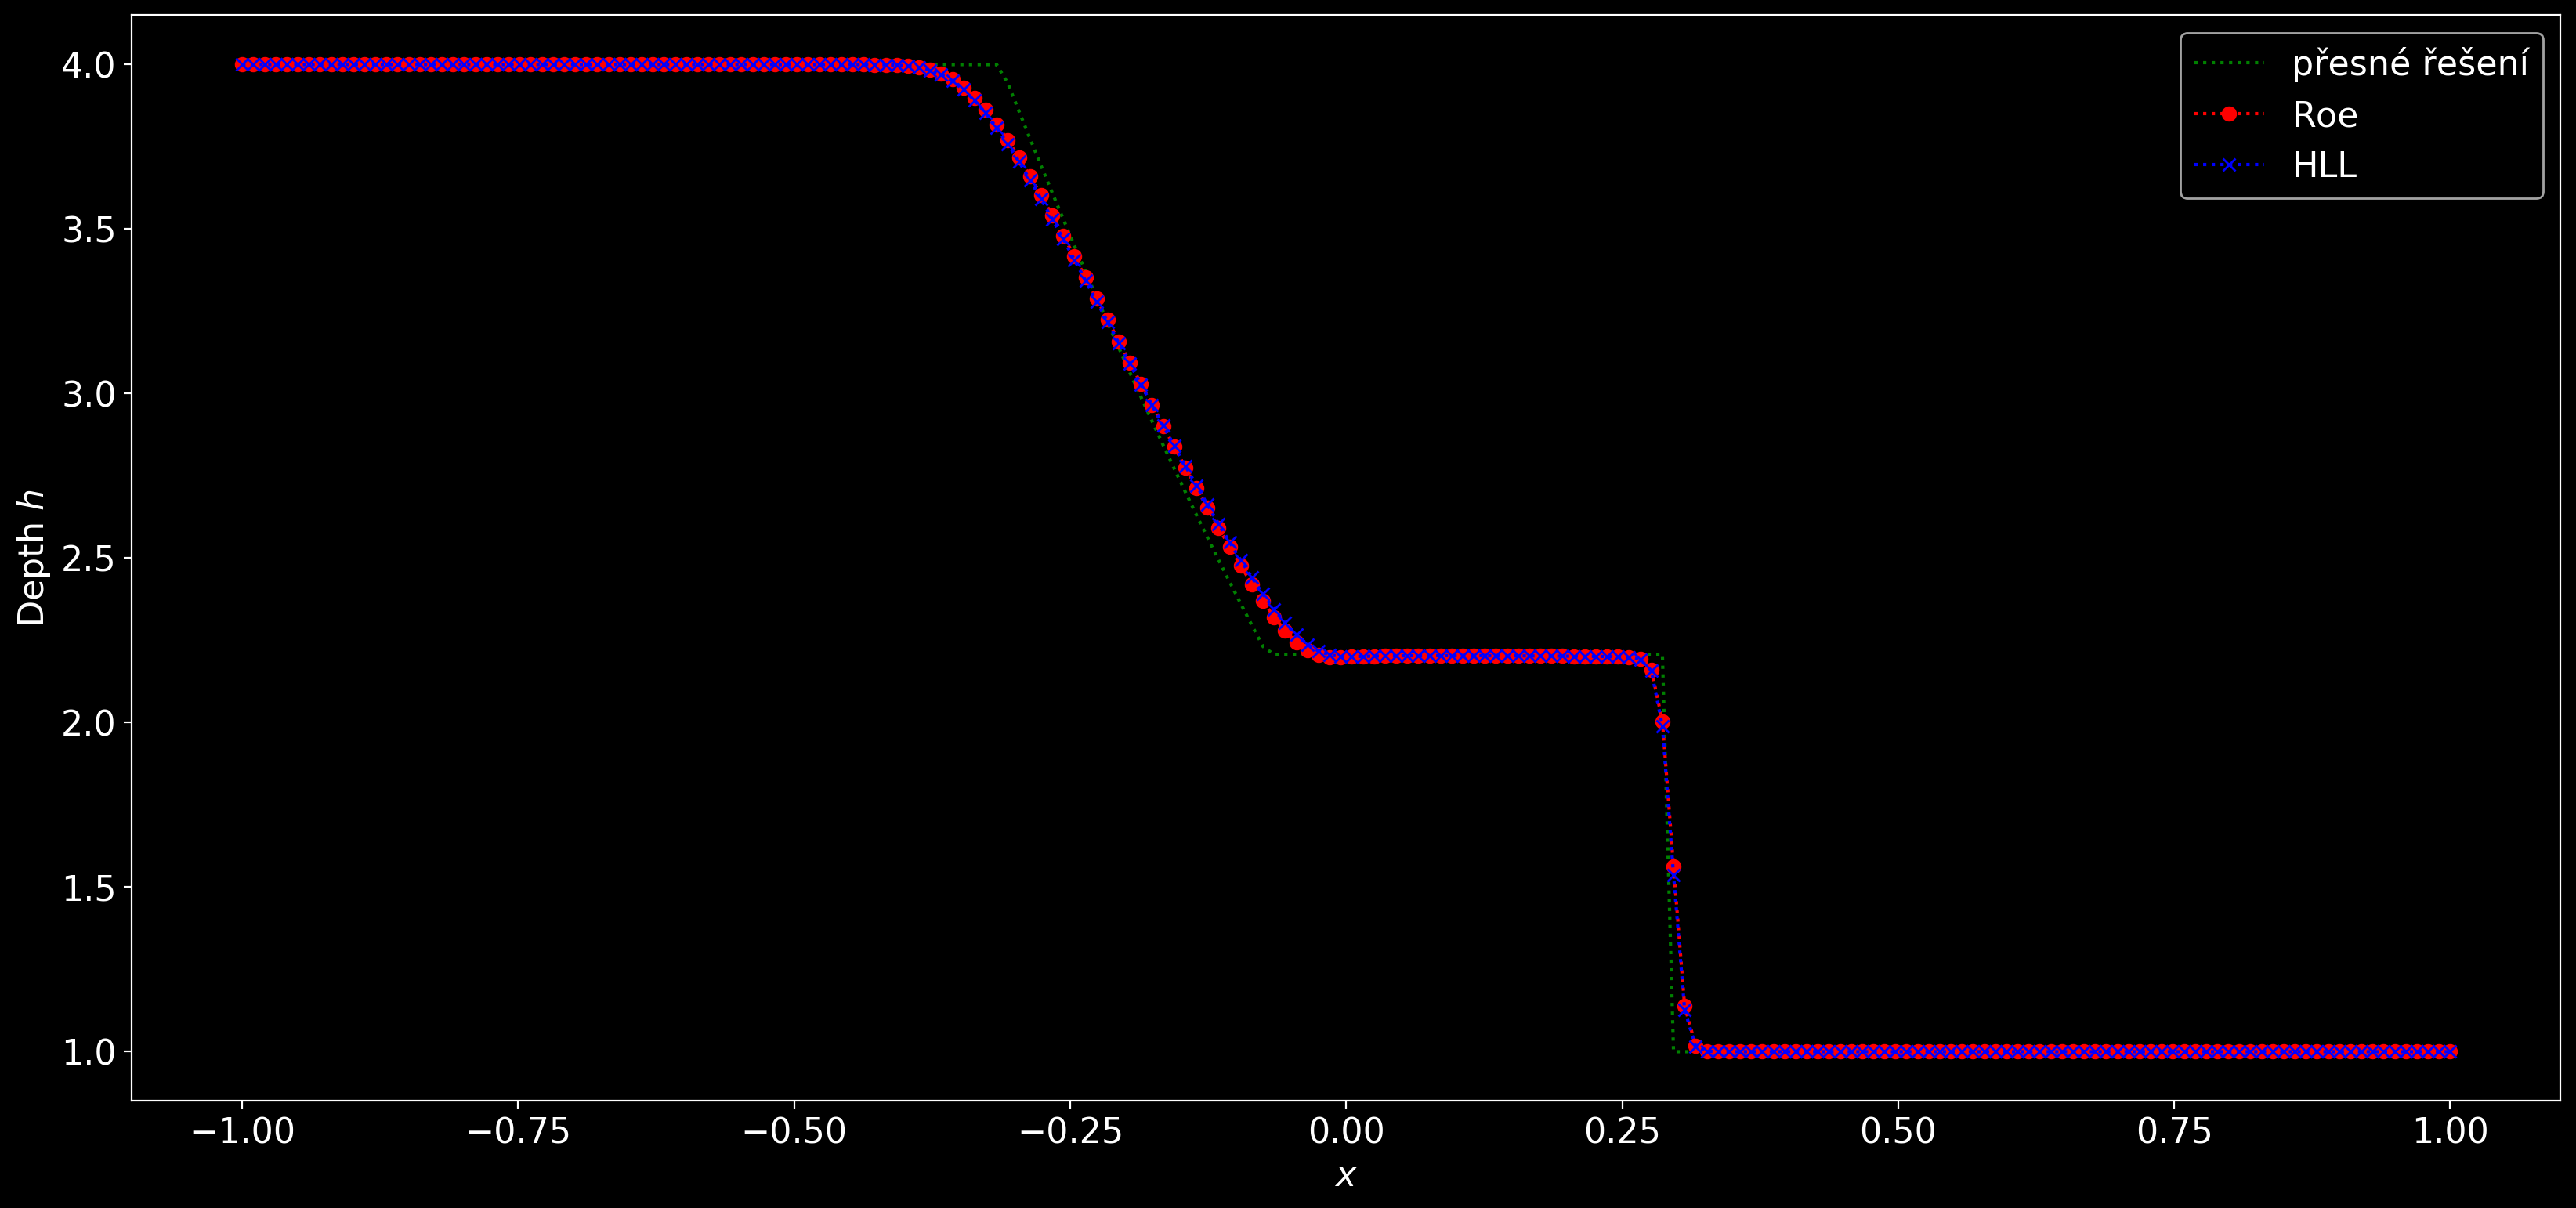

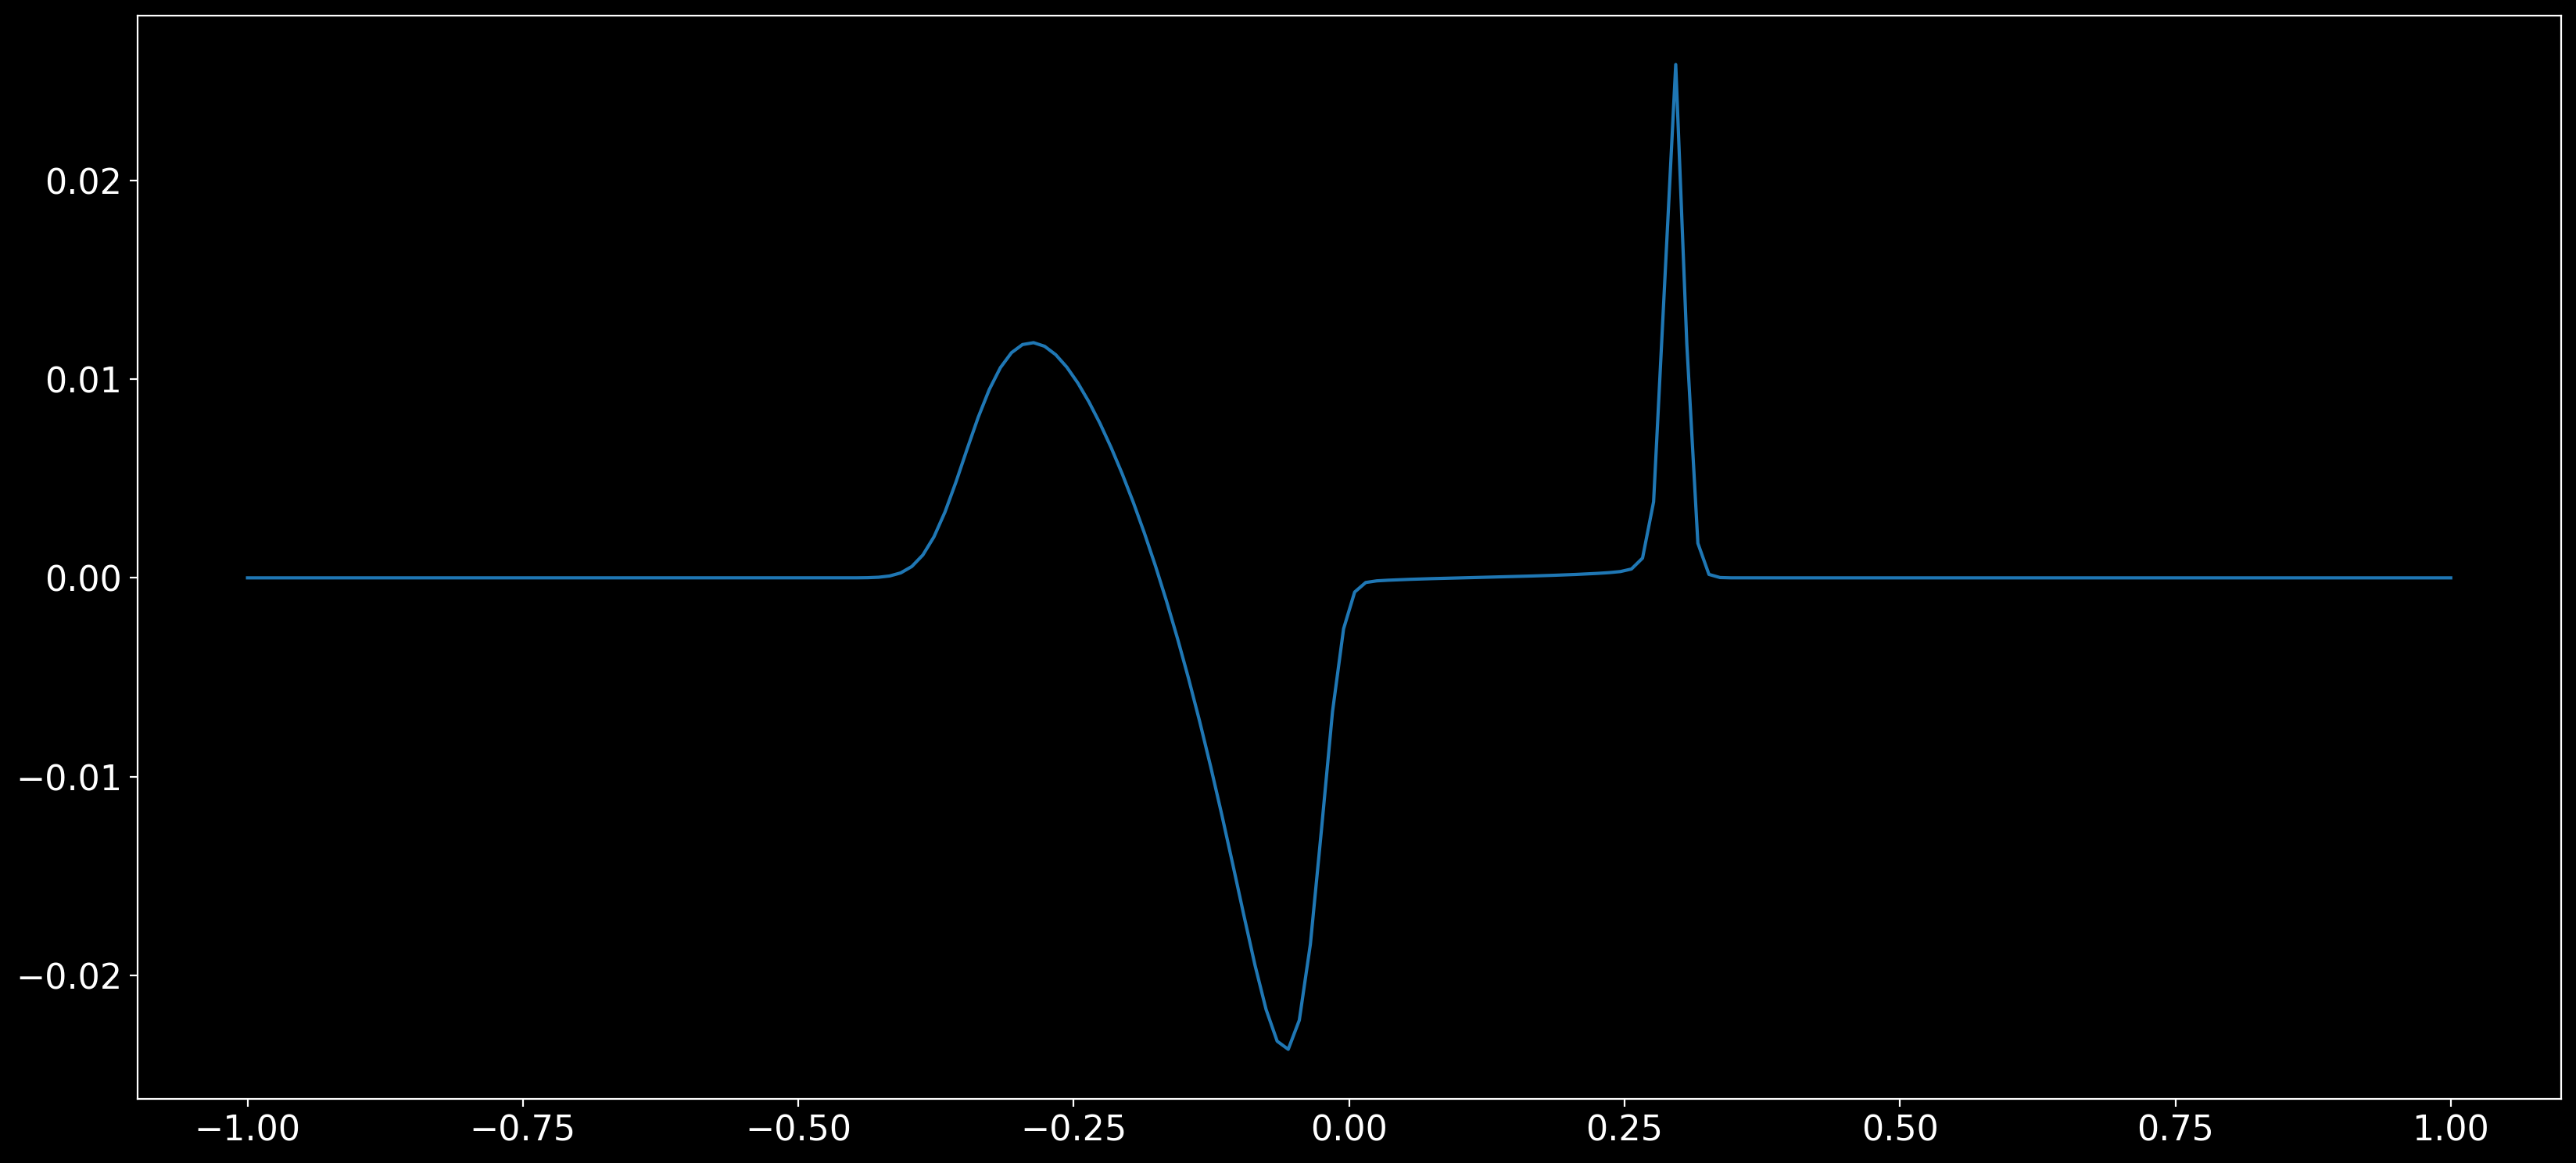

In [20]:
N = 200;
Q = shallow_ic(N, 1)
Q_roe, x = shallow_sol(Q, 
                riemann_solver=shallow_roe_1D,
                plot_sol=False)
Q = shallow_ic(N, 1)
Q_hll, x = shallow_sol(Q, 
                riemann_solver=shallow_hll_1D,
                plot_sol=False)
plt.plot(x, exact_sol(x/.05)[0], 'g:', label = 'přesné řešení')
plt.plot(x, Q_roe[0,:], 'ro:', label='Roe')
plt.plot(x, Q_hll[0,:], 'bx:', label='HLL')
plt.legend()
plt.ylabel('Depth $h$')
plt.xlabel('$x$')
plt.show()
plt.plot(x,Q_roe[0,:]-Q_hll[0,:])
plt.show()

### Godunova metoda 2.řádu, CFL podmínka

N: 200, Nt: 42, T: 0.05, dx: 0.01, dt: 0.0011904761904761906, CFL: 0.970708044266093
N: 200, Nt: 35, T: 0.05, dx: 0.01, dt: 0.0014285714285714286, CFL: 8.05746412359448
N: 200, Nt: 30, T: 0.05, dx: 0.01, dt: 0.0016666666666666668, CFL: inf


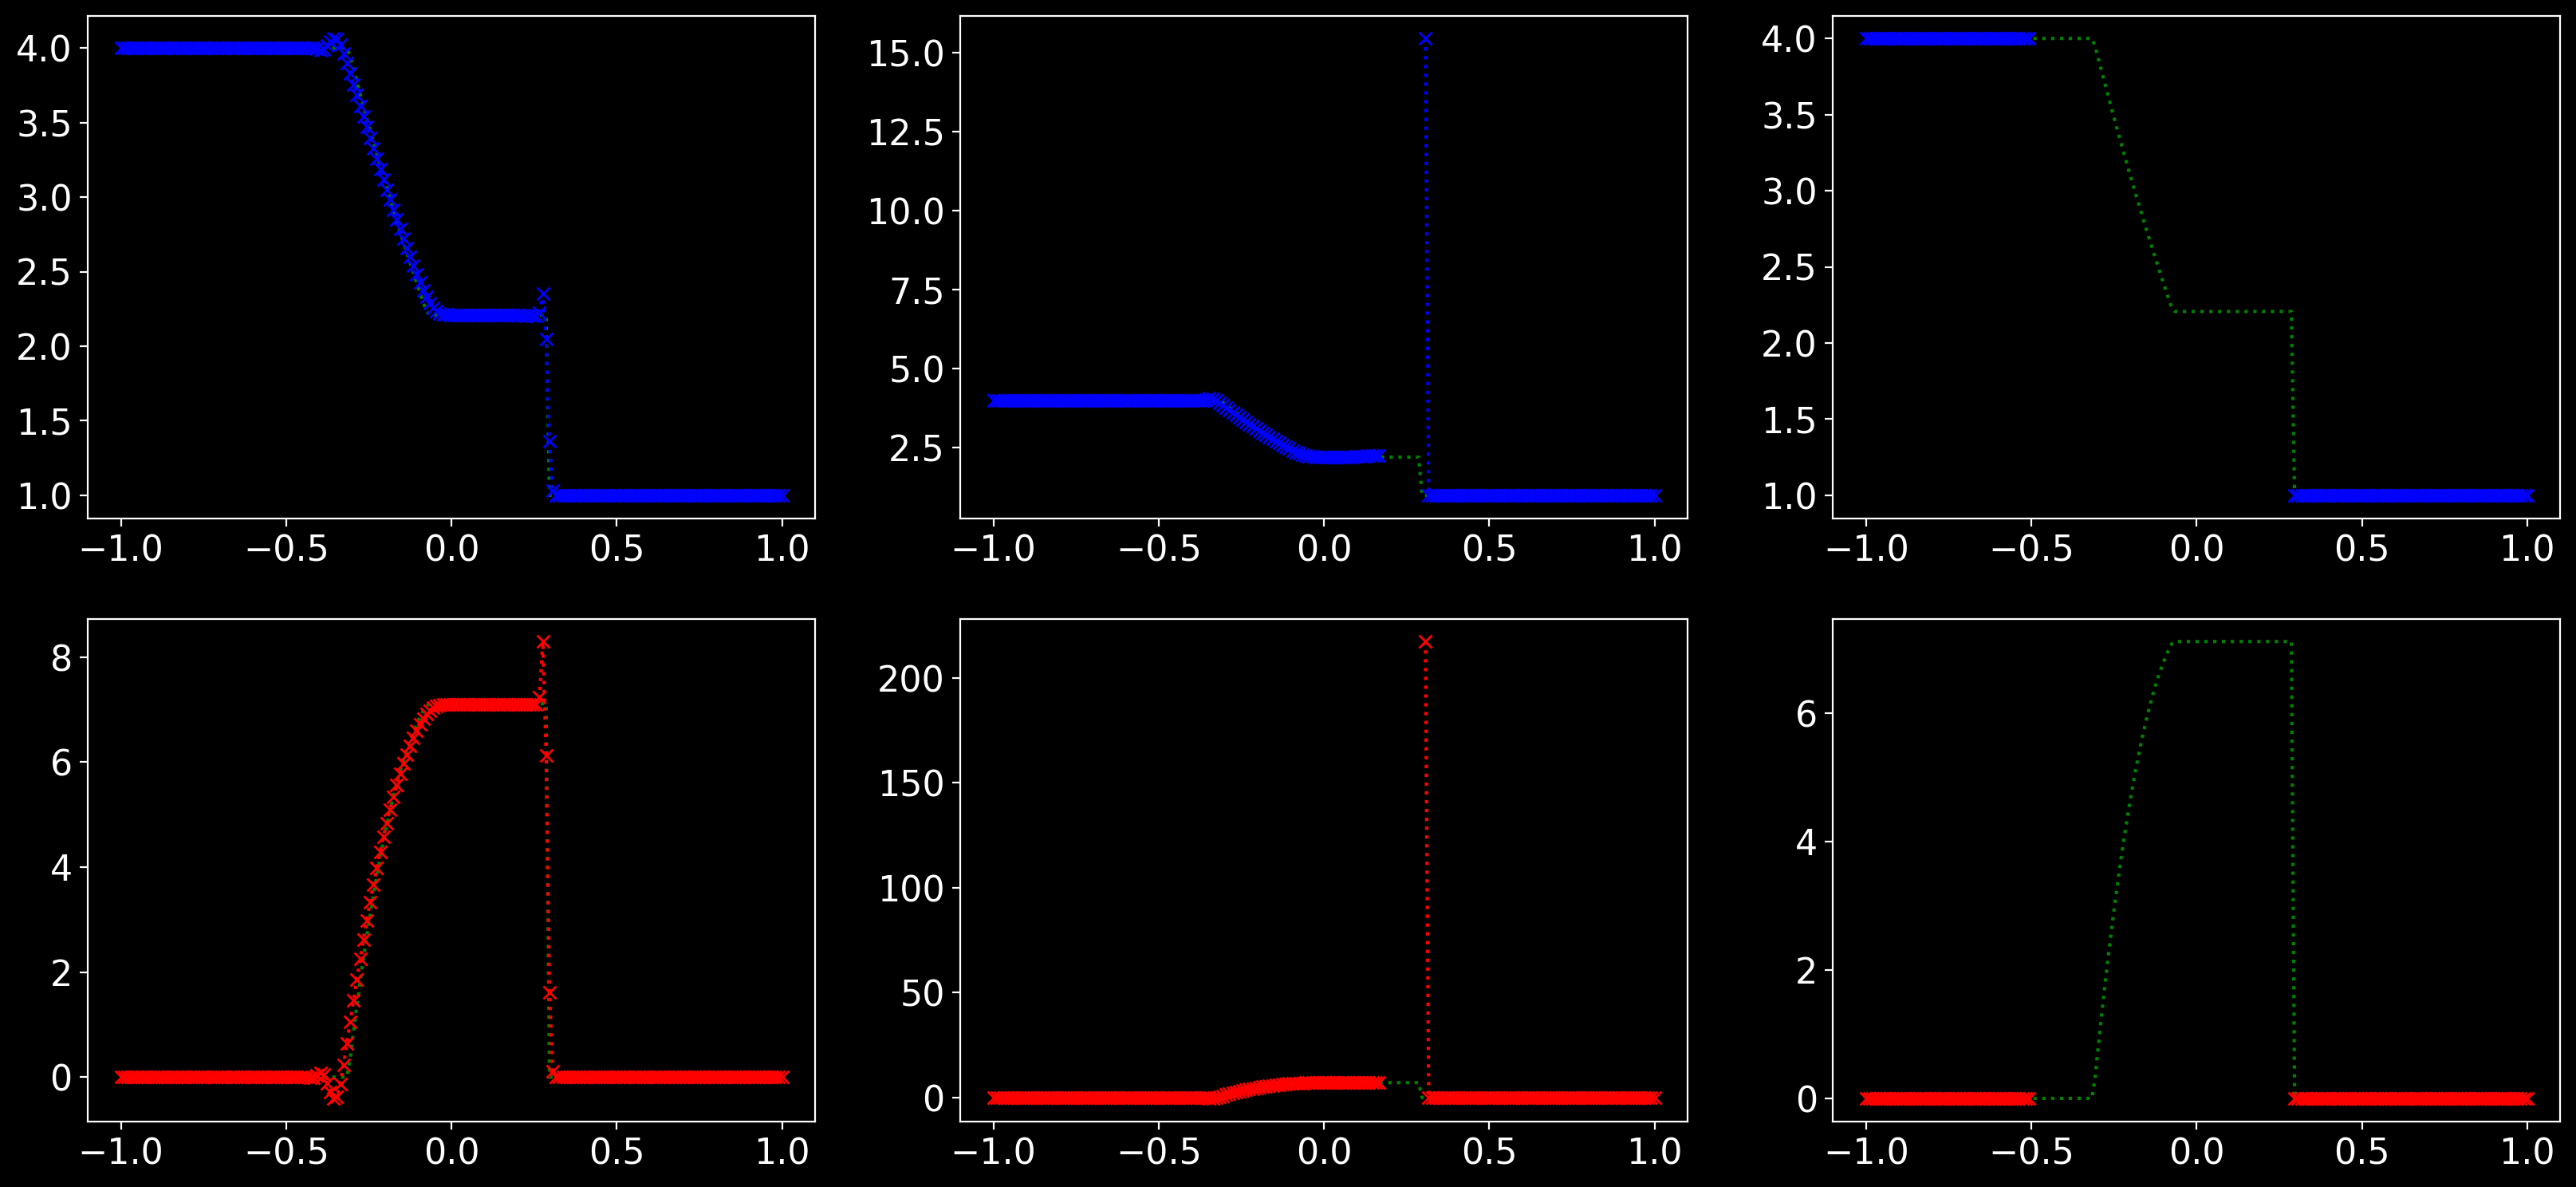

In [10]:
# 2nd order, Roe Riemann solver
Nt = [42, 35, 30]
for i in range(3):
    N = 200;
    Q = shallow_ic(N, 1)
    Q_roe, x = shallow_sol(Q, 
                    N = N,
                    Nt = Nt[i],
                    higher_order = True,
                    limiter = tvd.minmod,
                    riemann_solver=shallow_roe_1D,
                    plot_sol=False)
    plt.subplot(2, 3, i+1)
    plt.plot(x, exact_sol(x/.05)[0], 'g:')
    plt.plot(x, Q_roe[0,:], 'bx:')
    plt.subplot(2, 3, i+4)
    plt.plot(x, exact_sol(x/.05)[1], 'g:')
    plt.plot(x, Q_roe[1,:], 'rx:')
plt.show()

### Godunova metoda 2.řádu, limitry

N: 200, Nt: 50, T: 0.05, dx: 0.01, dt: 0.001, CFL: 0.8329484586645072
N: 200, Nt: 50, T: 0.05, dx: 0.01, dt: 0.001, CFL: 0.8483995375294457
N: 200, Nt: 50, T: 0.05, dx: 0.01, dt: 0.001, CFL: 0.8502126610614298
N: 200, Nt: 50, T: 0.05, dx: 0.01, dt: 0.001, CFL: 0.851455375851828
N: 200, Nt: 50, T: 0.05, dx: 0.01, dt: 0.001, CFL: 0.8469265164132653


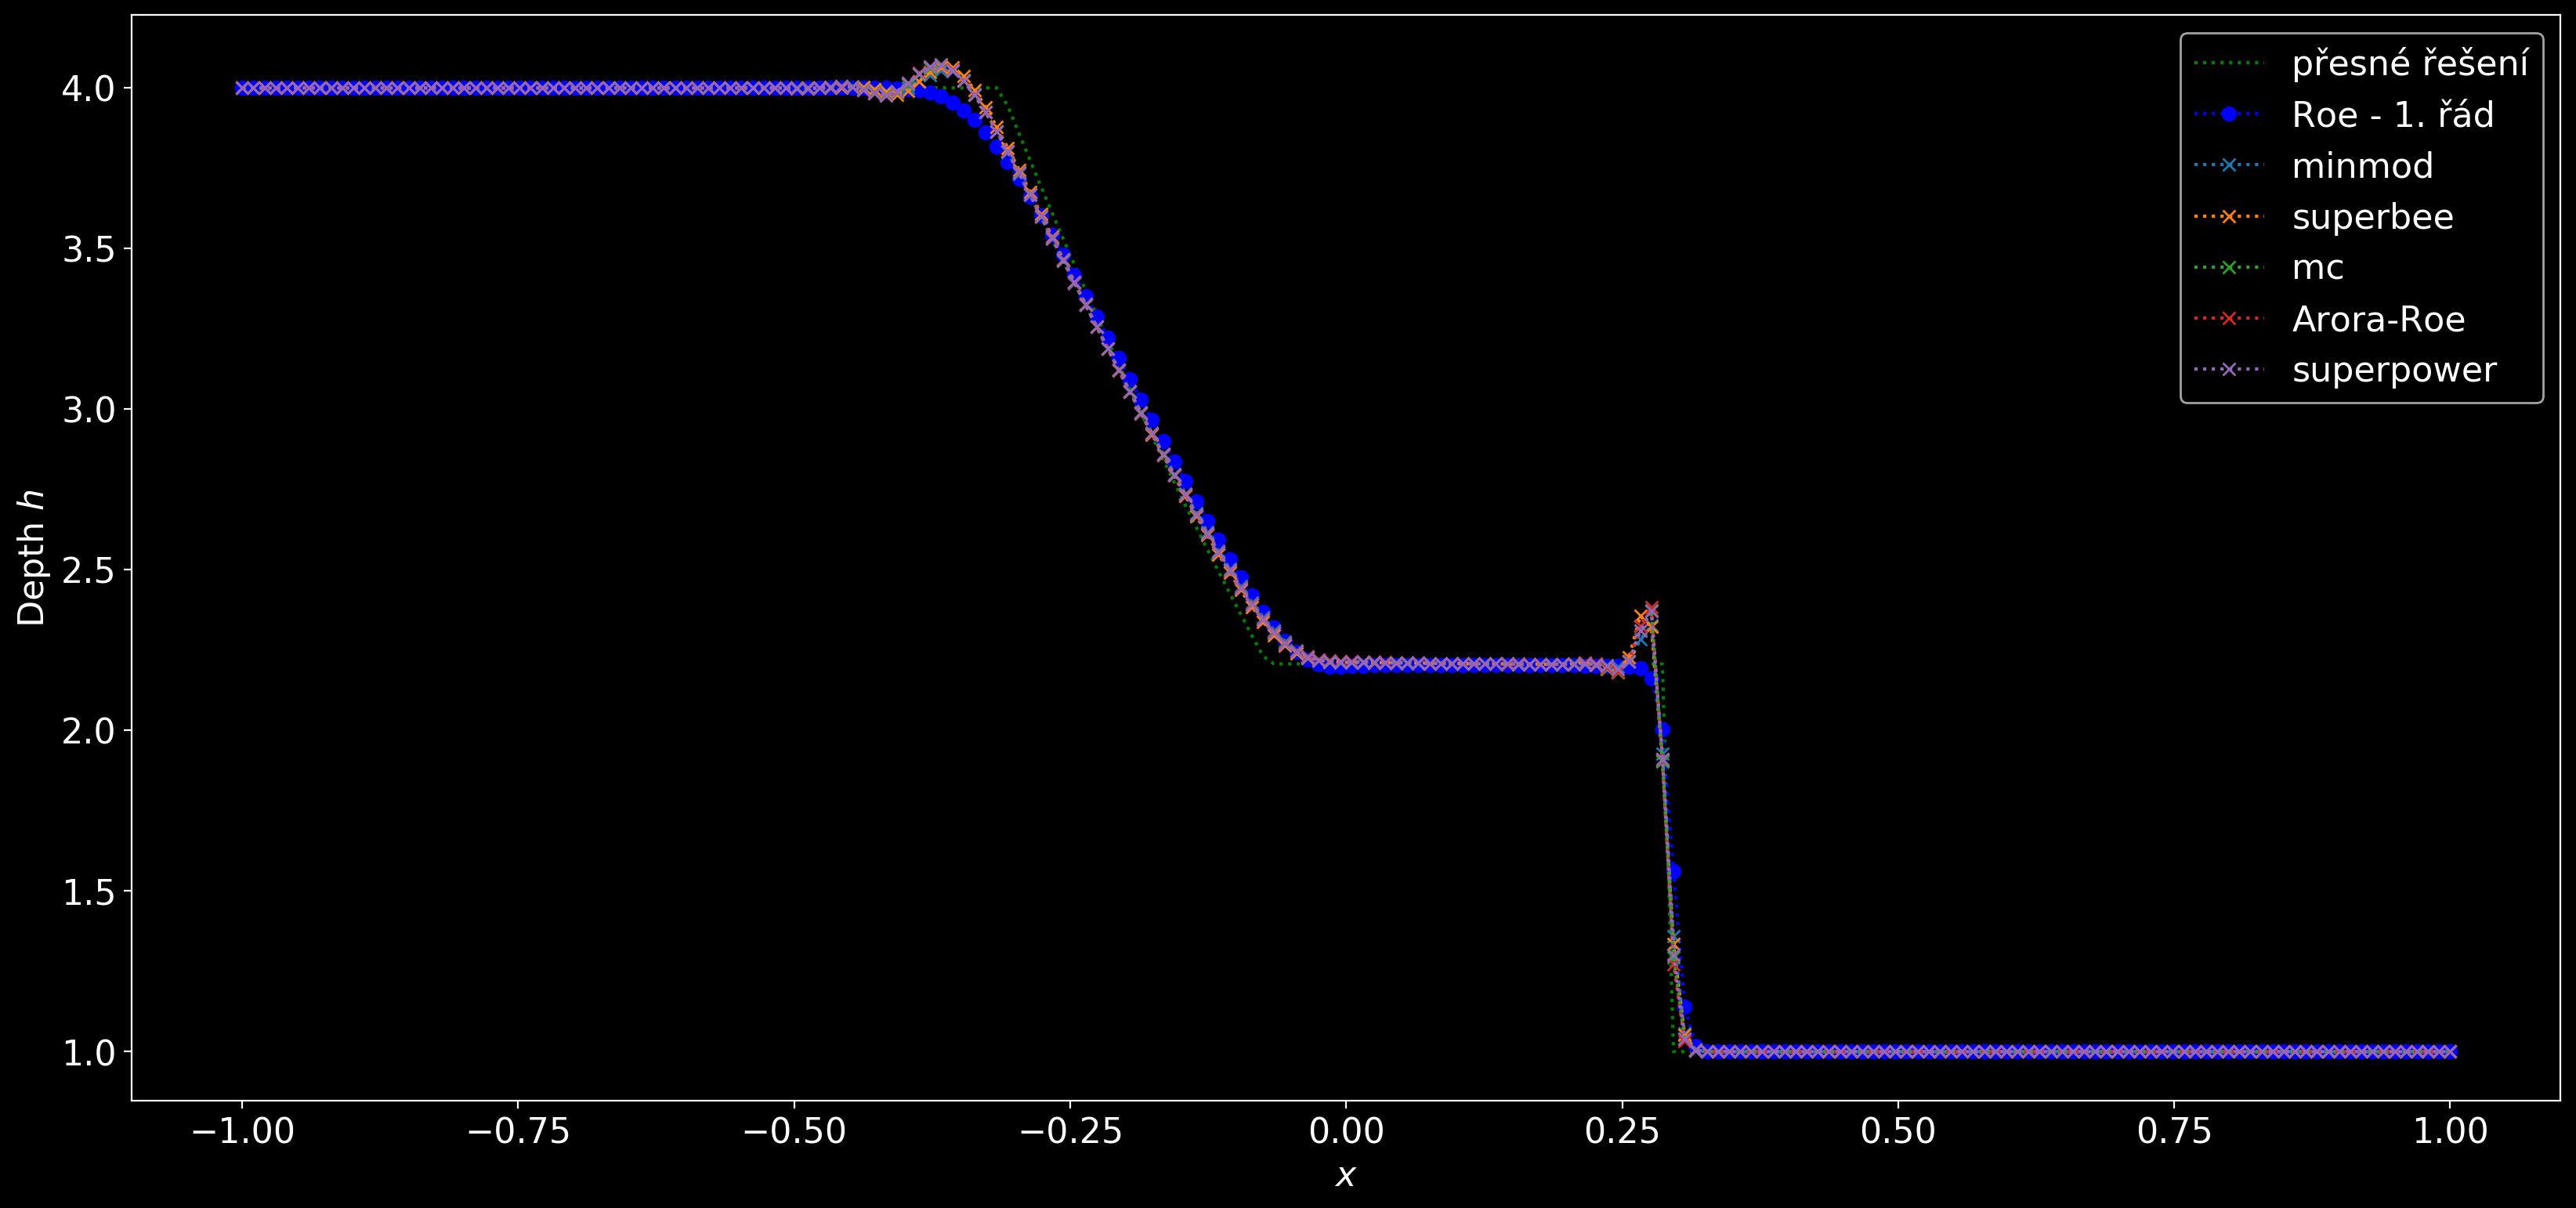

In [21]:
Nt = 180
limiters = [1,2,4,11,20]
lim_names = ['minmod','superbee','mc','Arora-Roe','superpower']

N = 200
plt.plot(x, exact_sol(x/.05)[0], 'g:', label = 'přesné řešení')
plt.plot(x, Q_roe[0,:], 'bo:', label = 'Roe - 1. řád')

for i in range(5):
    Q = shallow_ic(N, 1)
    Q_roe, x = shallow_sol(Q, 
                    N = N,       
                    #Nt = Nt,
                    higher_order = True,
                    limiter = limiters[i],
                    riemann_solver=shallow_hll_1D,
                    plot_sol=False)

    plt.plot(x, Q_roe[0,:], 'x:',label = lim_names[i])
plt.legend()
plt.ylabel('Depth $h$')
plt.xlabel('$x$')    
plt.show()